In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import random
import os
from PIL import Image
import matplotlib.pyplot as plt
import os
import random
from PIL import Image
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Concatenate, GlobalAveragePooling2D, GlobalMaxPooling2D, Reshape, Add, Multiply
from tensorflow.keras.models import Model

import seaborn as sns
import numpy as np

from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import os

# Directory containing the HMDB51 dataset
dataset_dir = '/content/drive/MyDrive/HMDB51/HMDB51/'

# Get the list of subdirectories (class names)
class_names = os.listdir(dataset_dir)

# Loop over each class and print its name
for class_name in class_names:
    print(class_name)

brush_hair
cartwheel
catch
chew
clap
climb
climb_stairs
dive
draw_sword
dribble
drink
eat
fall_floor
fencing
flic_flac
golf
handstand
hit
hug
jump
kick
kick_ball
kiss
laugh
pick
pour
pullup
punch
push
pushup
ride_bike
ride_horse
run
shake_hands
shoot_ball
shoot_bow
shoot_gun
sit
situp
smile
smoke
somersault
stand
swing_baseball
sword
sword_exercise
talk
throw
turn
walk
wave


Directories in dataset directory:
['brush_hair', 'catch', 'chew', 'clap', 'climb_stairs', 'dive', 'draw_sword', 'dribble', 'drink', 'eat', 'fall_floor', 'fencing', 'flic_flac', 'golf', 'handstand', 'hit', 'hug', 'kick', 'kiss', 'laugh', 'pick', 'pour', 'pullup', 'push', 'ride_bike', 'ride_horse', 'run', 'shake_hands', 'shoot_ball', 'shoot_bow', 'shoot_gun', 'sit', 'situp', 'smile', 'smoke', 'somersault', 'stand', 'swing_baseball', 'sword', 'sword_exercise', 'talk', 'throw', 'turn', 'walk', 'wave']


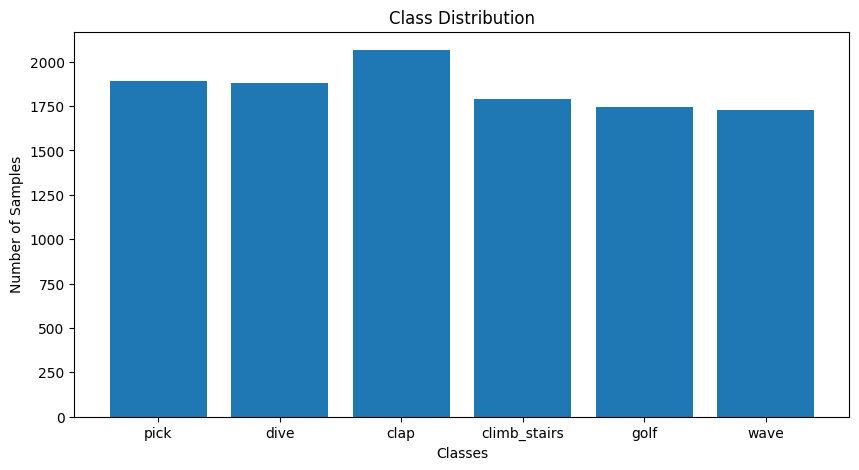

In [10]:


# Directory containing the HMDB51 dataset
dataset_dir = '/content/drive/MyDrive/HMDB51/HMDB51/'

# Define the 6 classes
selected_classes = ['pick', 'dive', 'clap', 'climb_stairs', 'golf', 'wave']
print("Directories in dataset directory:")
print(os.listdir(dataset_dir))
# Count the number of samples (images) per class
class_counts = {}
for class_name in selected_classes:
    class_dir = os.path.join(dataset_dir, class_name)
    total_images = 0
    if os.path.exists(class_dir):
        # Iterate over subfolders
        for subfolder in os.listdir(class_dir):
            subfolder_path = os.path.join(class_dir, subfolder)
            if os.path.isdir(subfolder_path):
                # Count the number of image files in the subfolder
                total_images += len([f for f in os.listdir(subfolder_path) if f.endswith('.jpg')])
    else:
        print(f"Directory not found for class: {class_name}")

    class_counts[class_name] = total_images

# Plot the class distribution
plt.figure(figsize=(10, 5))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.show()


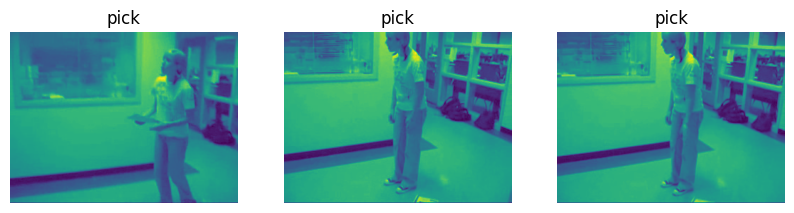

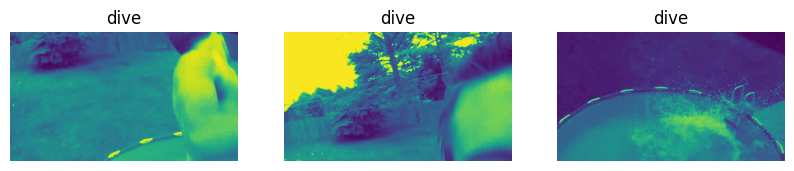

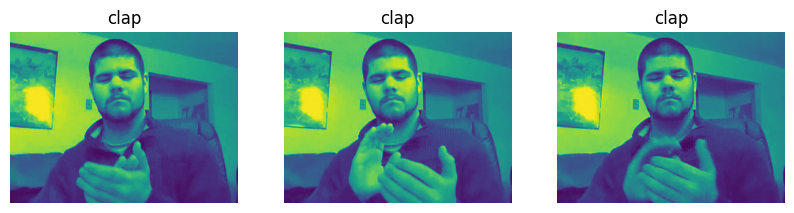

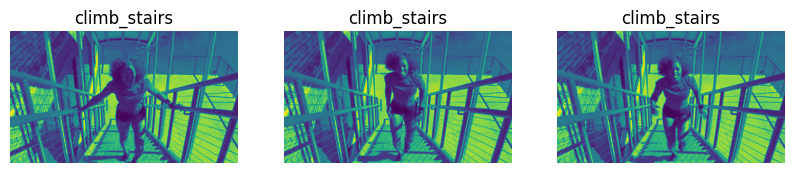

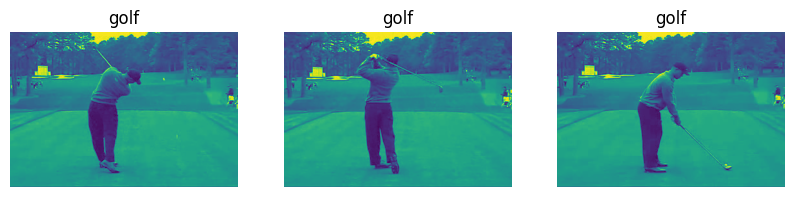

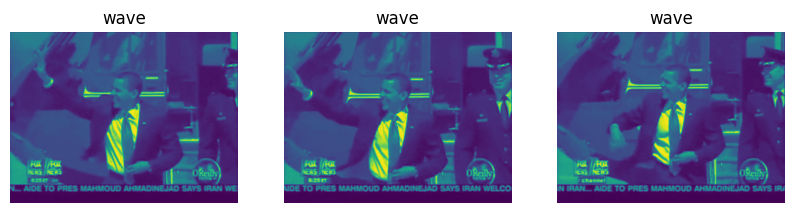

In [12]:


# Display a few sample images from each class
for class_name in selected_classes:
    class_dir = os.path.join(dataset_dir, class_name)
    subfolders = os.listdir(class_dir)
    subfolder = random.choice(subfolders)
    subfolder_path = os.path.join(class_dir, subfolder)
    image_files = [f for f in os.listdir(subfolder_path) if f.endswith('.jpg')]

    plt.figure(figsize=(10, 10))
    for i, image_file in enumerate(random.sample(image_files, min(3, len(image_files)))):
        image_path = os.path.join(subfolder_path, image_file)
        img = Image.open(image_path)
        plt.subplot(1, 3, i + 1)
        plt.imshow(img.convert('L'))
        plt.title(class_name)
        plt.axis('off')
    plt.show()


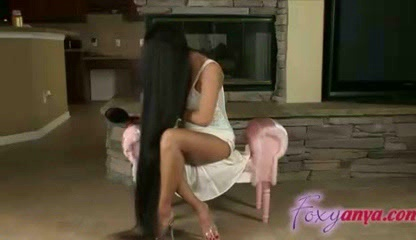

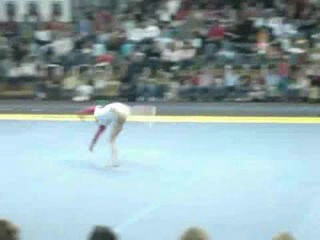

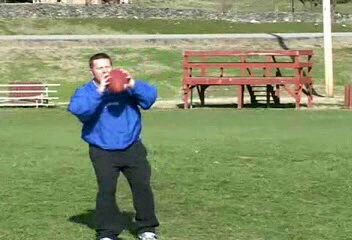

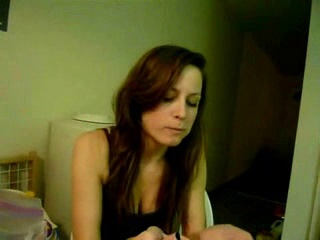

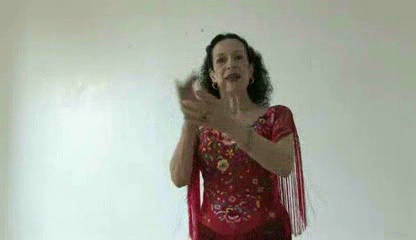

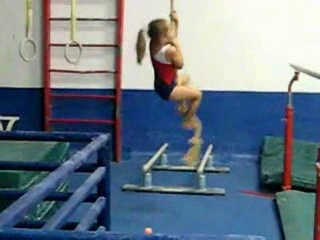

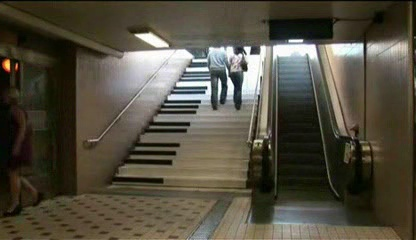

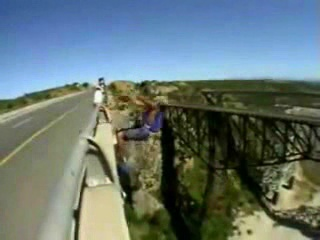

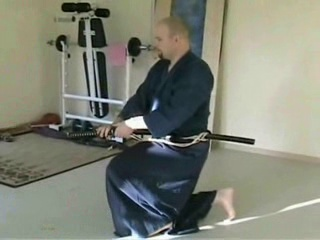

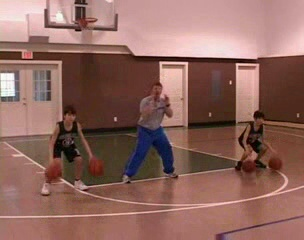

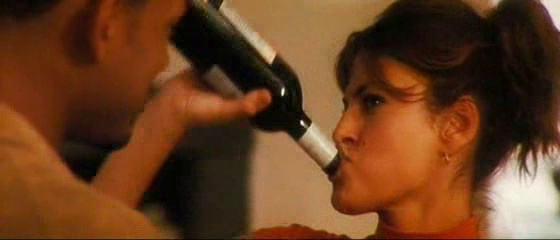

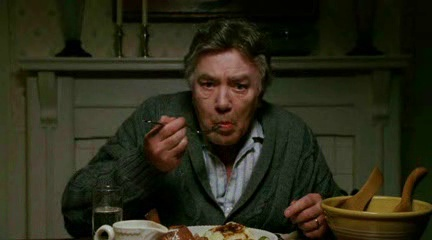

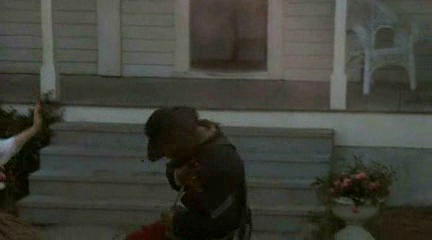

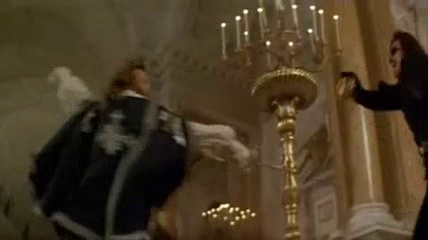

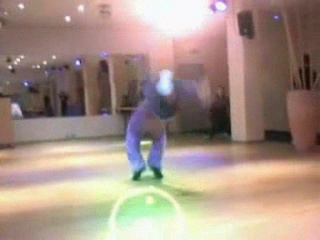

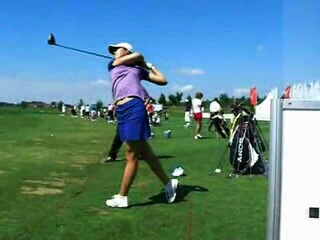

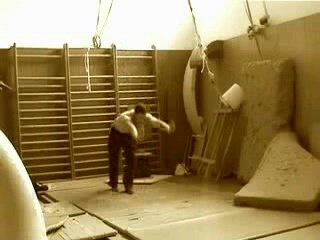

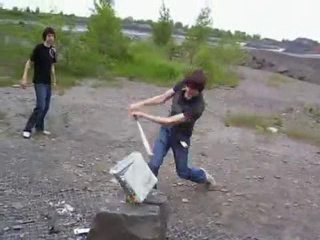

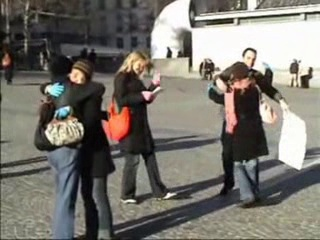

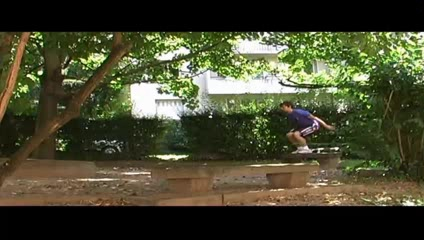

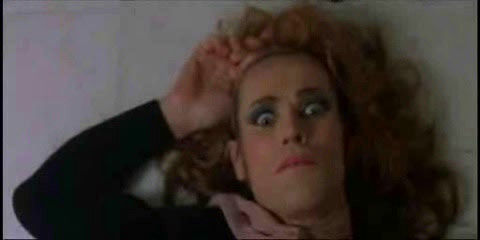

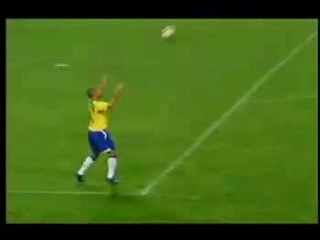

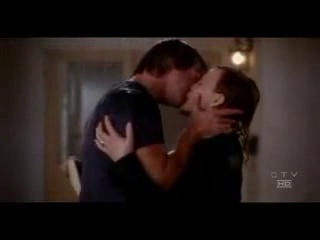

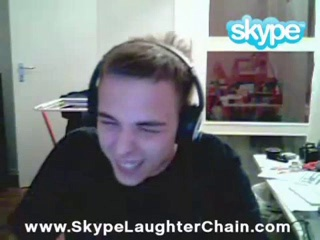

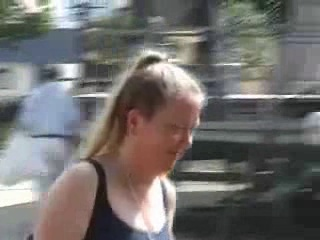

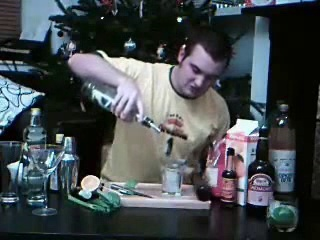

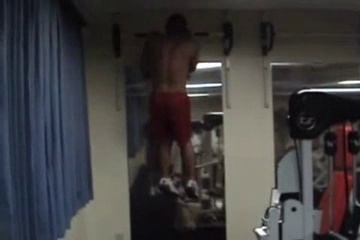

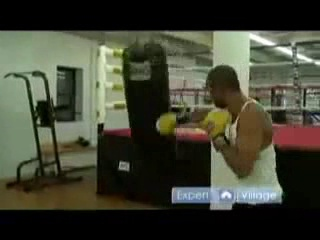

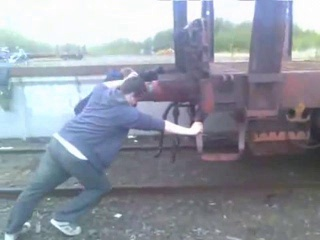

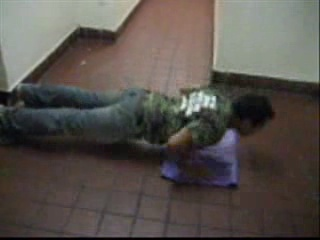

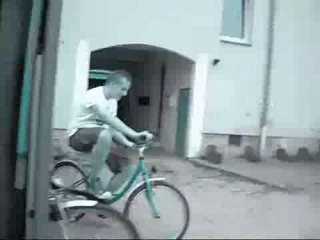

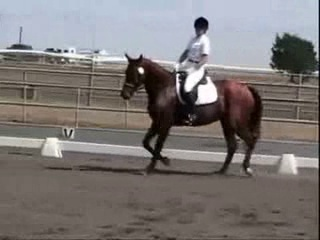

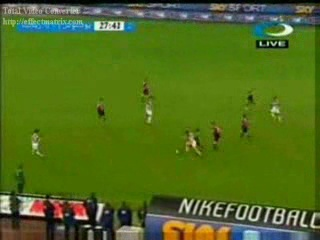

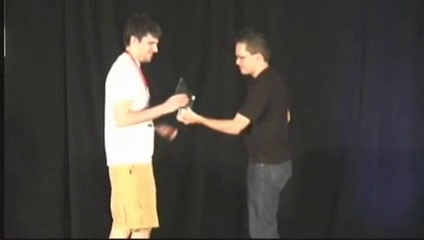

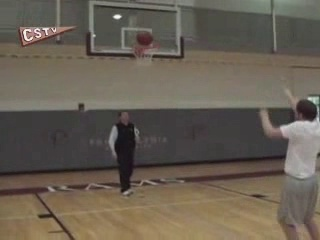

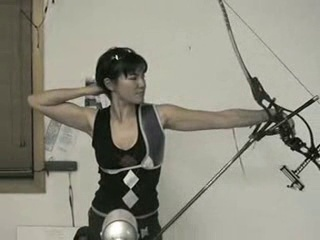

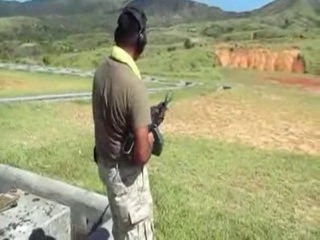

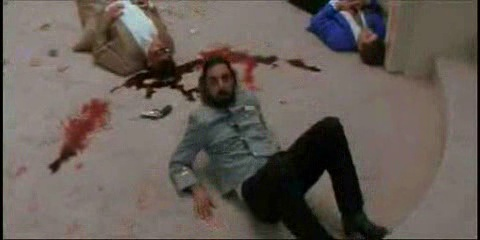

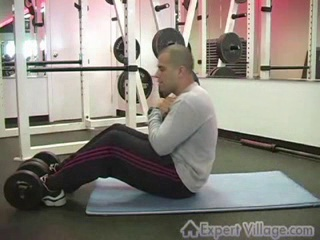

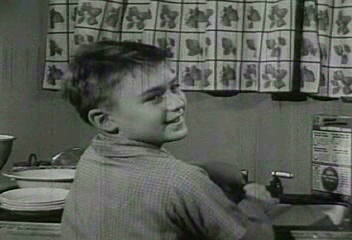

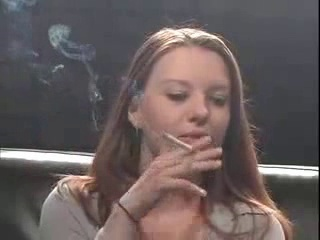

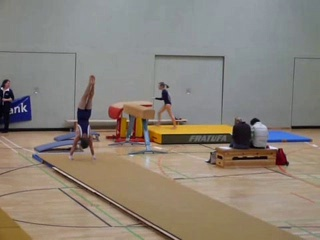

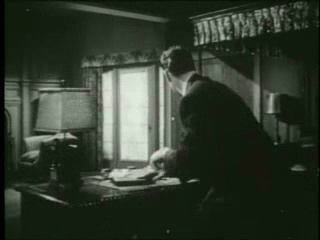

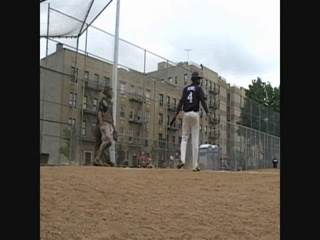

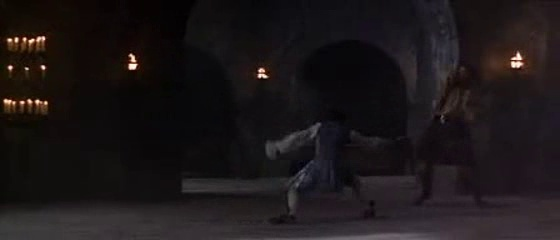

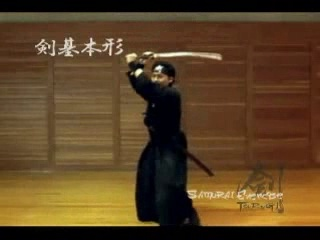

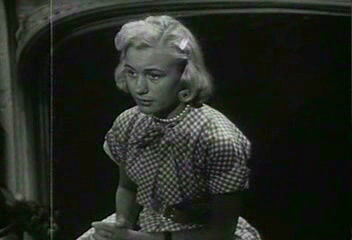

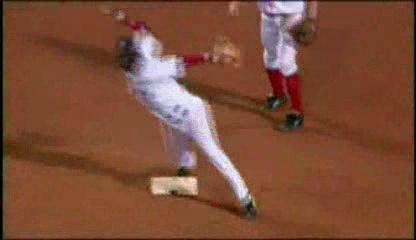

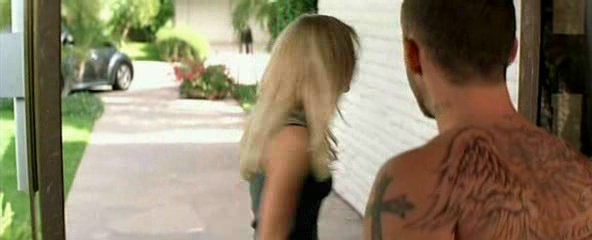

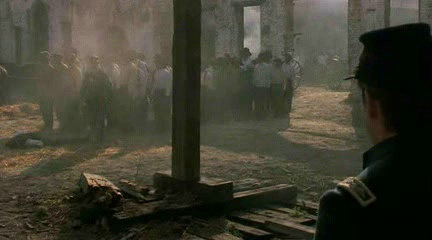

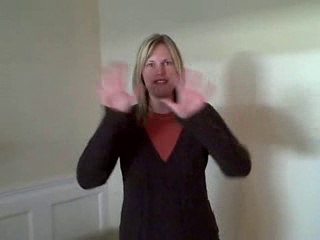

In [ ]:


# Directory containing the HMDB51 dataset
dataset_dir = '/content/drive/MyDrive/HMDB51/HMDB51/'

# Get the list of subdirectories (class names)
class_names = os.listdir(dataset_dir)

# Loop over each class directory
for class_name in class_names:
    class_dir = os.path.join(dataset_dir, class_name)

    # Get the list of folders (videos) within the class directory
    video_folders = os.listdir(class_dir)

    # Choose a random video folder (assuming folders contain images)
    random_video_folder = random.choice(video_folders)
    video_folder_path = os.path.join(class_dir, random_video_folder)

    # Get the list of images (assuming they are JPEG files) in the video folder
    images = [f for f in os.listdir(video_folder_path) if f.endswith('.jpg')]

    # Choose a random image
    random_image = random.choice(images)
    image_path = os.path.join(video_folder_path, random_image)

    # Display the image (using PIL)
    image = Image.open(image_path)
    image.show()

    # If you're using a Jupyter notebook or similar environment, you can also display inline:
    display(image)


In [2]:


# Directory containing the HMDB51 dataset
dataset_dir = '/content/drive/MyDrive/HMDB51/HMDB51/'

# Define the 6 classes
selected_classes = ['pick', 'dive', 'clap', 'climb_stairs', 'golf', 'wave']

# Create an ImageDataGenerator for rescaling and augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 20% of the data will be used for validation
    horizontal_flip=True,  # Randomly flip images horizontally
    rotation_range=10,  # Randomly rotate images by 10 degrees
    zoom_range=0.2  # Randomly zoom into images
)

# Create a generator for training data
train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(48, 48),
    color_mode='grayscale',  # Change to 'rgb' if you want color images
    classes=selected_classes,
    class_mode='categorical',
    batch_size=32,
    subset='training'
)

# Create a generator for validation data
validation_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(48, 48),
    color_mode='grayscale',  # Change to 'rgb' if you want color images
    classes=selected_classes,
    class_mode='categorical',
    batch_size=32,
    subset='validation'
)


Found 8884 images belonging to 6 classes.
Found 2216 images belonging to 6 classes.


In [4]:


def spatial_attention(input_feature):
    # Spatial attention mechanism
    avg_pool = GlobalAveragePooling2D()(input_feature)
    max_pool = GlobalMaxPooling2D()(input_feature)
    concat = Add()([avg_pool, max_pool])
    spatial_attention = Dense(units=1, activation='sigmoid')(concat)
    spatial_attention = Reshape((1, 1, -1))(spatial_attention)
    return Multiply()([input_feature, spatial_attention])



def channel_attention(input_feature):
    # Channel attention mechanism
    avg_pool = GlobalAveragePooling2D()(input_feature)
    max_pool = GlobalMaxPooling2D()(input_feature)
    concat = Concatenate(axis=-1)([avg_pool, max_pool])
    num_channels = int(input_feature.shape[-1])  # Convert tensor to integer
    channel_attention = Dense(units=num_channels // 2, activation='relu')(concat)
    channel_attention = Dense(units=num_channels, activation='sigmoid')(channel_attention)
    return Multiply()([input_feature, channel_attention])


def cbam_block(input_feature):
    # CBAM block combining spatial and channel attention
    spatial = spatial_attention(input_feature)
    channel = channel_attention(input_feature)
    return Add()([spatial, channel])

def build_cbam_model(input_shape=(48, 48, 1), num_classes=6):
    inputs = tf.keras.Input(shape=input_shape)

    # Convolutional layers
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    x = cbam_block(x)

    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    return model

# Build the CBAM model
input_shape = (48, 48, 1)  # Grayscale images of size 48x48
num_classes = 6  # Number of classes in the dataset
model = build_cbam_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])




In [5]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 48, 48, 1)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 48, 48, 32)           320       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 48, 48, 32)           128       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)           0         ['batch_normalization[0][0

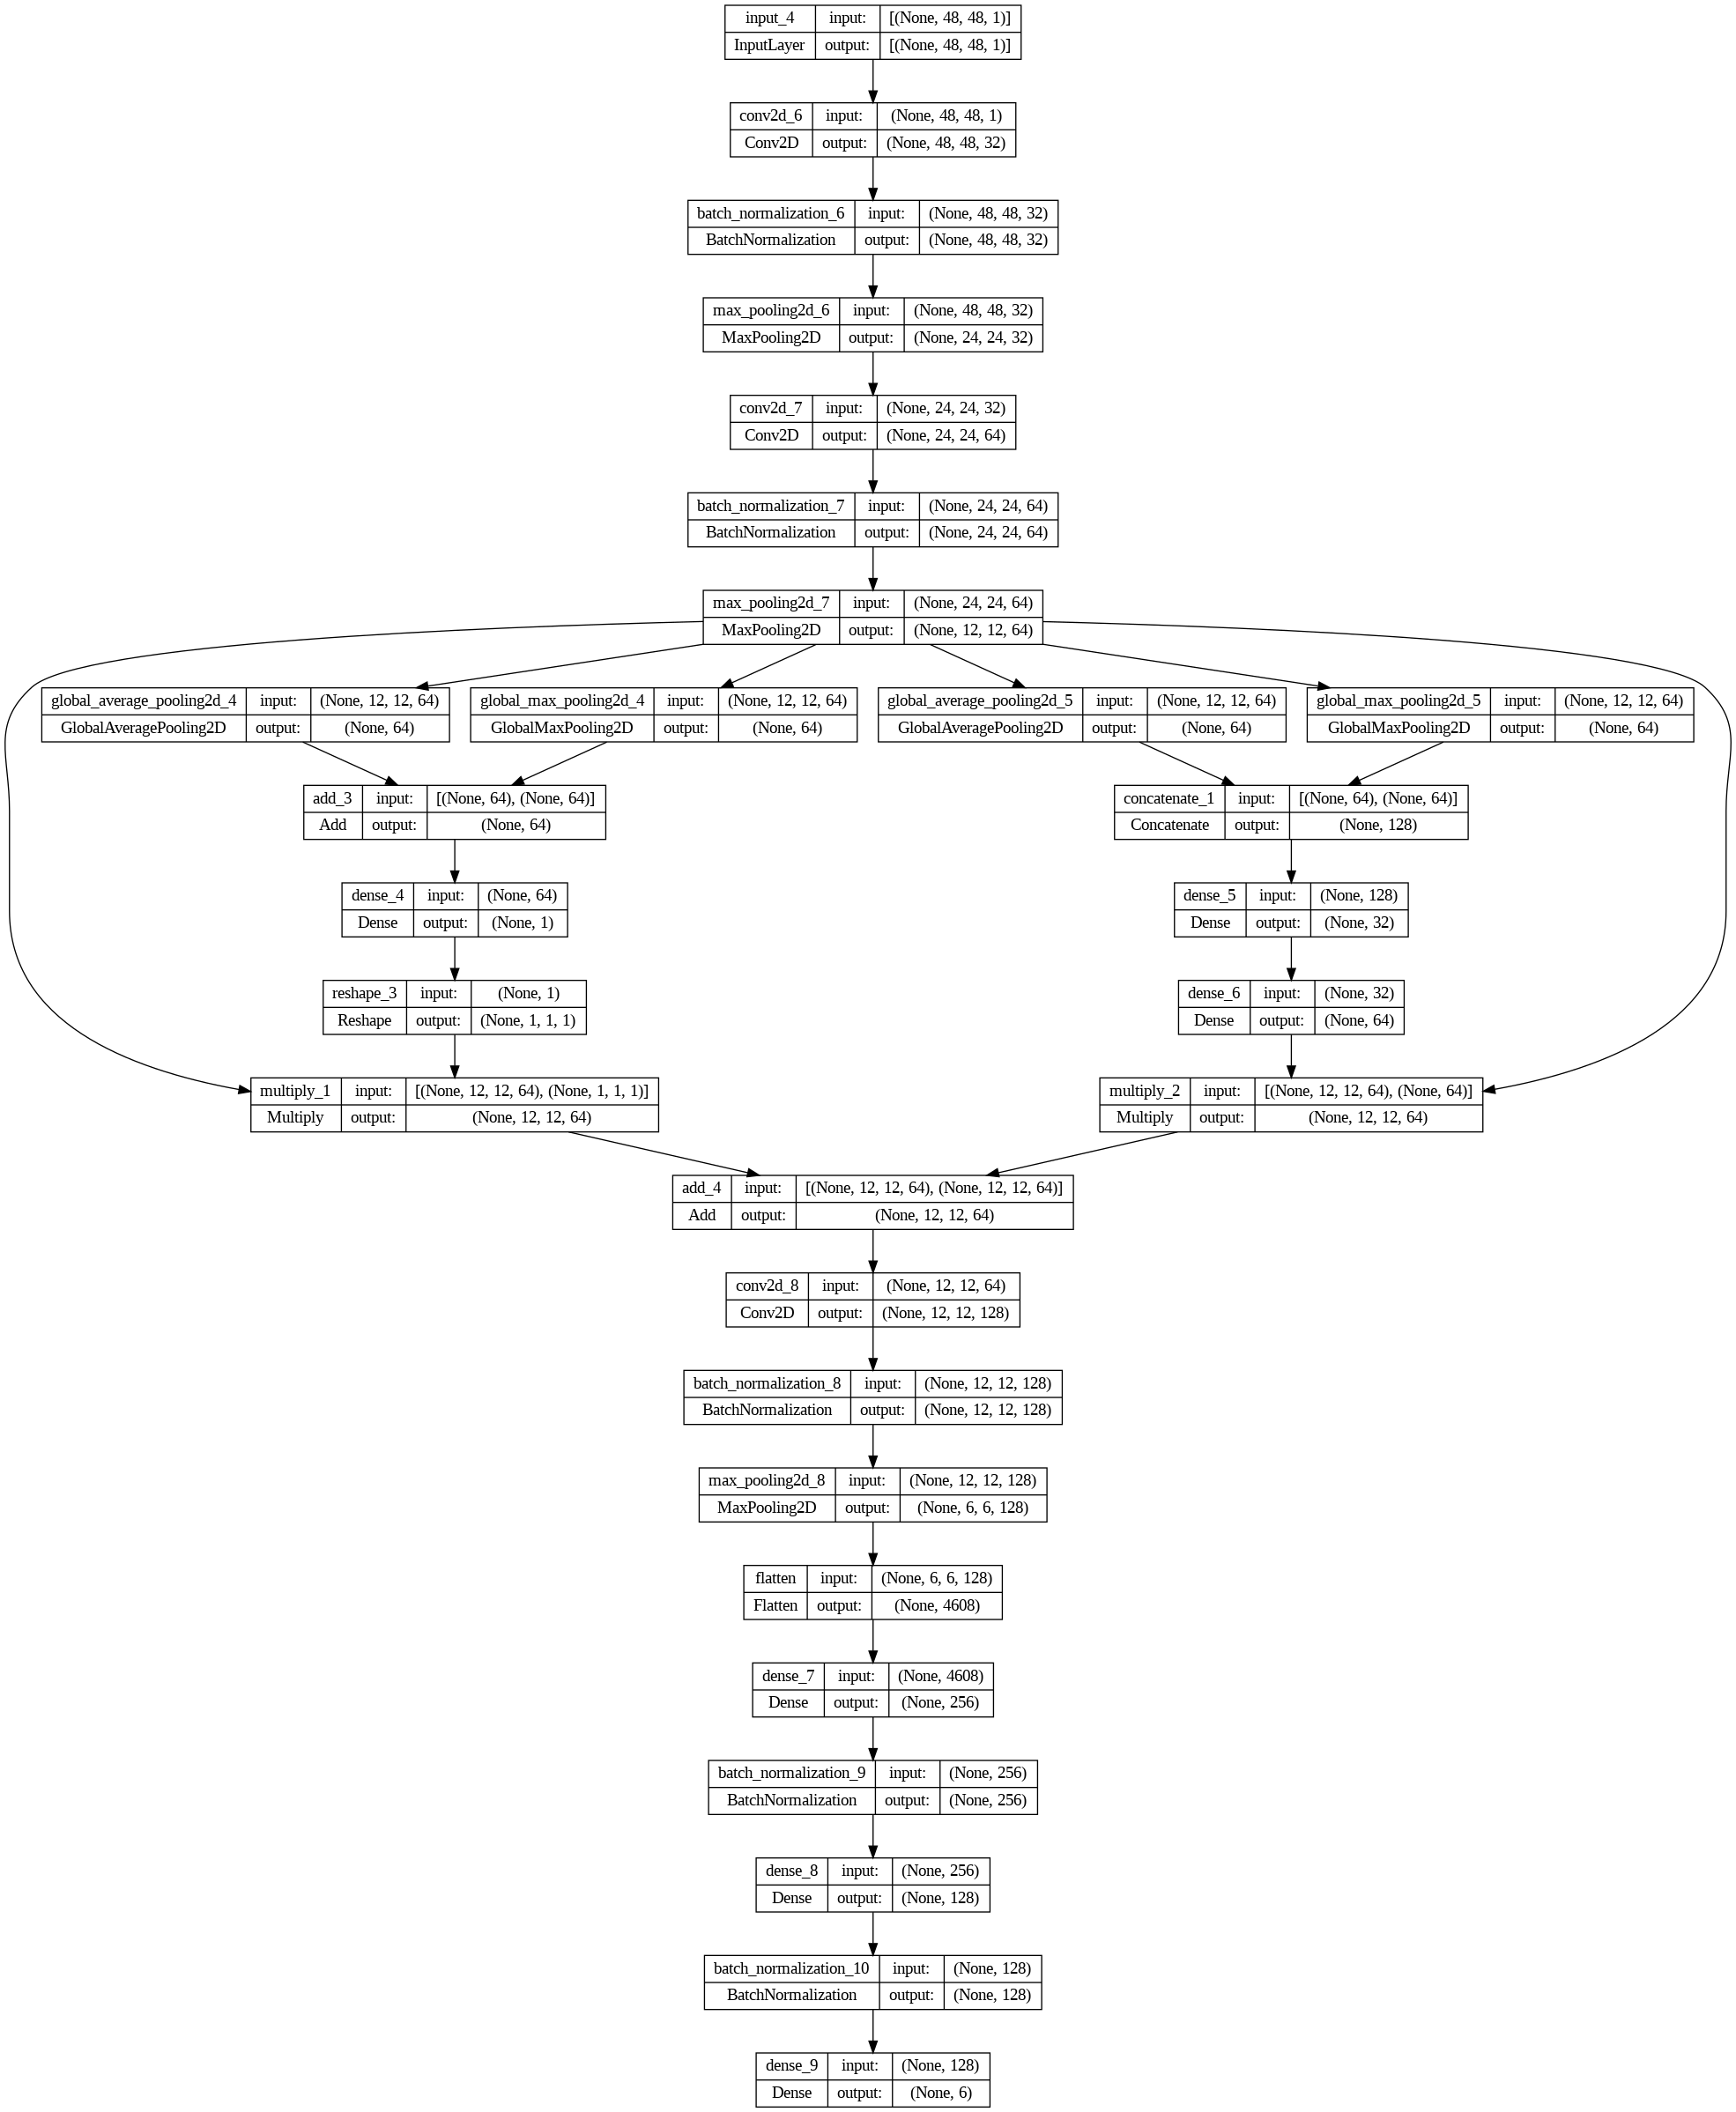

In [7]:
from tensorflow.keras.utils import plot_model

# Plot the model architecture
plot_model(model, to_file='cbam_model.png', show_shapes=True, show_layer_names=True)


In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=validation_generator
)

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation loss: {loss}')
print(f'Validation accuracy: {accuracy}')

# Generate classification report
predictions = model.predict(validation_generator)
y_pred = tf.argmax(predictions, axis=1)
y_true = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())
report = classification_report(y_true, y_pred, target_names=class_labels)
print(report)

Epoch 1/25
278/278 [==============================] - ETA: 0s - loss: 0.9638 - accuracy: 0.6460 

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs=100,
    batch_size=32,
    optimizer=Adam(lr=0.0001),
    validation_data=validation_generator
)

Epoch 1/100
1691/1691 [==============================] - 14s 8ms/step - loss: 0.3015 - accuracy: 0.8782 - val_loss: 0.2741 - val_accuracy: 0.9017
Epoch 2/100
1691/1691 [==============================] - 10s 6ms/step - loss: 0.2063 - accuracy: 0.9259 - val_loss: 0.2365 - val_accuracy: 0.9184
Epoch 3/100
1691/1691 [==============================] - 10s 6ms/step - loss: 0.1755 - accuracy: 0.9409 - val_loss: 0.2565 - val_accuracy: 0.9238
Epoch 4/100
1691/1691 [==============================] - 11s 6ms/step - loss: 0.1611 - accuracy: 0.9460 - val_loss: 0.2319 - val_accuracy: 0.9258
Epoch 5/100
1691/1691 [==============================] - 11s 6ms/step - loss: 0.1561 - accuracy: 0.9484 - val_loss: 0.2184 - val_accuracy: 0.9298
Epoch 6/100
1691/1691 [==============================] - 10s 6ms/step - loss: 0.1422 - accuracy: 0.9539 - val_loss: 0.1965 - val_accuracy: 0.9365
Epoch 7/100
1691/1691 [==============================] - 11s 6ms/step - loss: 0.1338 - accuracy: 0.9576 - val_loss: 0.1763 -

              precision    recall  f1-score   support

        pick       0.94      0.94      0.94      1000
        dive       0.95      0.94      0.95      1000
        clap       0.94      0.94      0.94      1000
climb_stairs       0.94      0.94      0.94      1000
        golf       0.95      0.94      0.95      1000
        wave       0.92      0.94      0.93      1000

    accuracy                           0.94      6000
   macro avg       0.94      0.94      0.94      6000
weighted avg       0.94      0.94      0.94      6000

Confusion Matrix
[[936   8  17  15  11  13]
 [  9 942  10  15   9  15]
 [ 13  10 942   8   9  18]
 [ 11   8  12 942   8  19]
 [ 13   6  11  13 939  18]
 [ 17  14  13   7  10 939]]


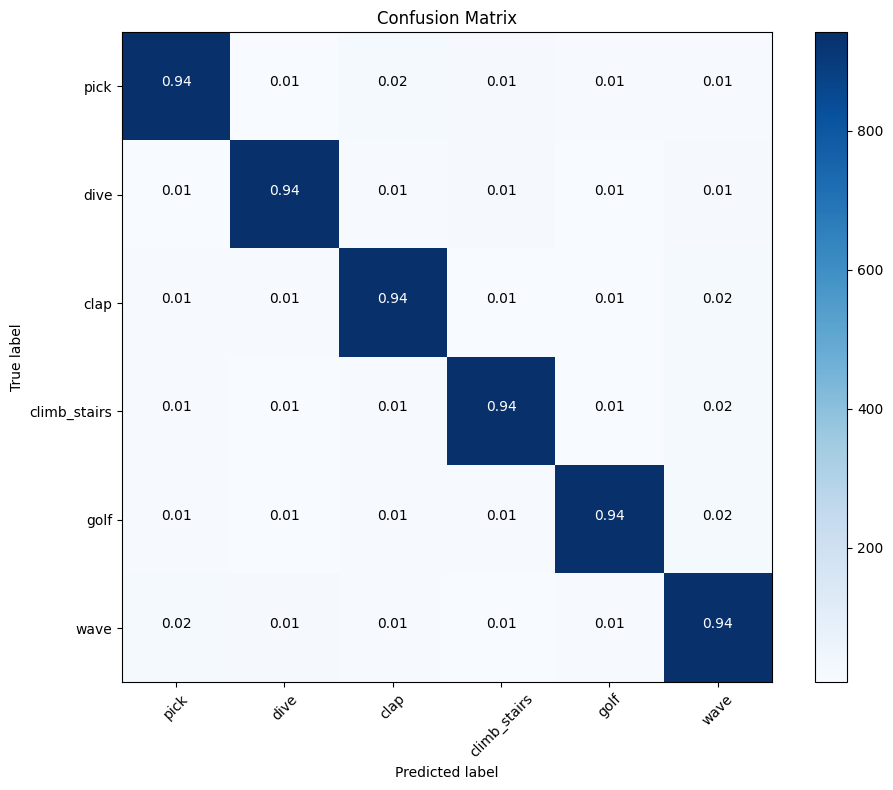

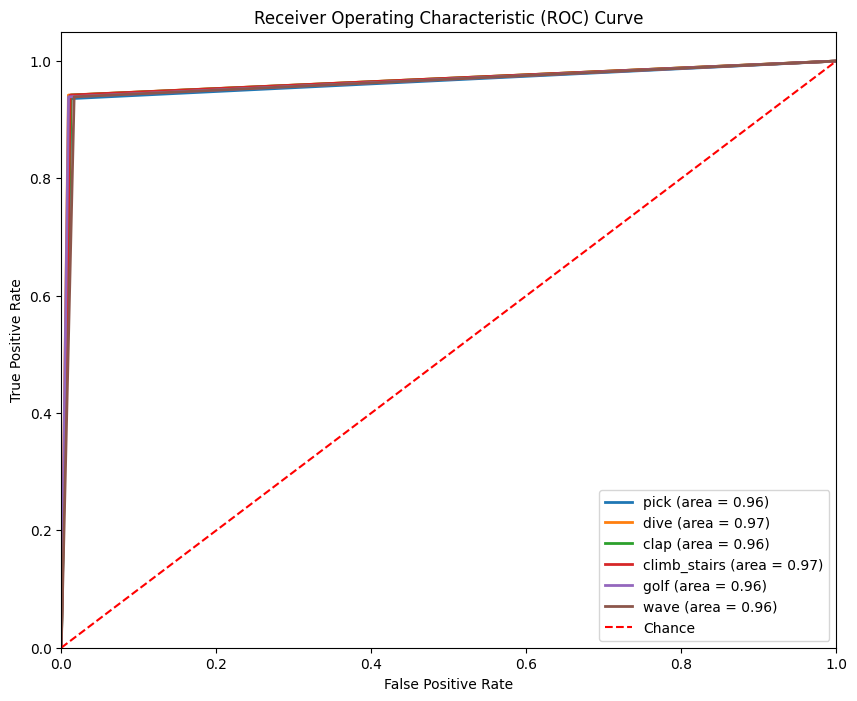

In [5]:




# Get true labels and predictions
Y_true = validation_generator.classes
Y_pred = model.predict(validation_generator)
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Generate classification report
print(classification_report(Y_true, Y_pred_classes, target_names=selected_classes))

# Confusion matrix
cm = confusion_matrix(Y_true, Y_pred_classes)
print('Confusion Matrix')
print(cm)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(selected_classes))
plt.xticks(tick_marks, selected_classes, rotation=45)
plt.yticks(tick_marks, selected_classes)

# Normalizing the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm_normalized[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if cm_normalized[i, j] > 0.5 else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

# ROC Curve
plt.figure(figsize=(10, 8))
for i, class_name in enumerate(selected_classes):
    fpr, tpr, _ = roc_curve(Y_true == i, Y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{class_name} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


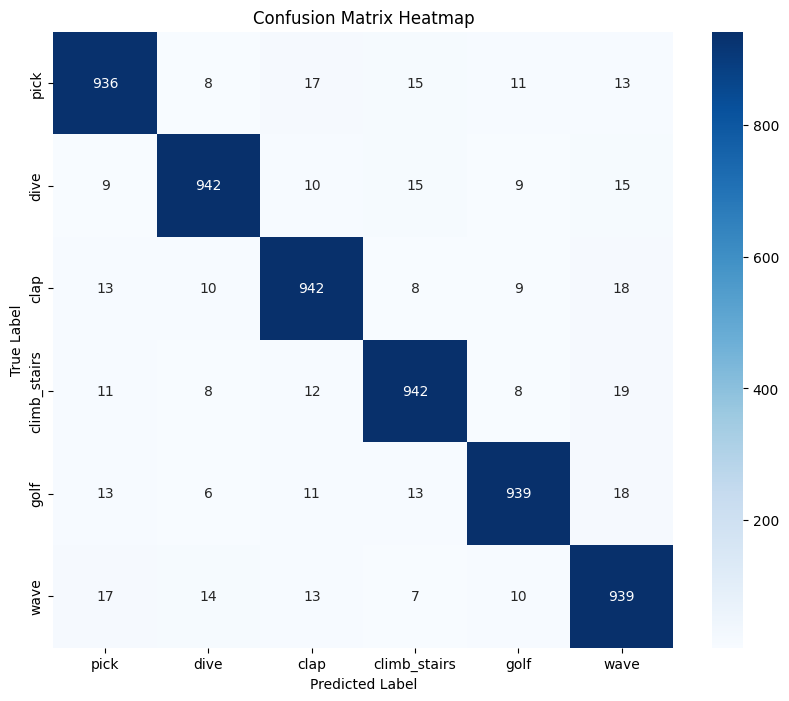

In [6]:

# Define the classes
selected_classes = ['pick', 'dive', 'clap', 'climb_stairs', 'golf', 'wave']

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=selected_classes, yticklabels=selected_classes)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


                   precision    recall  f1-score   support

Apply Eye Make up       0.82      0.83      0.82      1000
    Baby Crawling       0.83      0.82      0.83      1000
    Band Marching       0.85      0.83      0.84      1000
           Biking       0.83      0.84      0.84      1000
     Cricket Shot       0.83      0.83      0.83      1000
           Diving       0.82      0.82      0.82      1000

         accuracy                           0.83      6000
        macro avg       0.83      0.83      0.83      6000
     weighted avg       0.83      0.83      0.83      6000

Confusion Matrix
[[829  30  27  32  41  41]
 [ 48 824  33  26  33  36]
 [ 33  30 831  38  28  40]
 [ 35  37  24 845  28  31]
 [ 40  43  25  38 827  27]
 [ 32  33  37  38  36 824]]


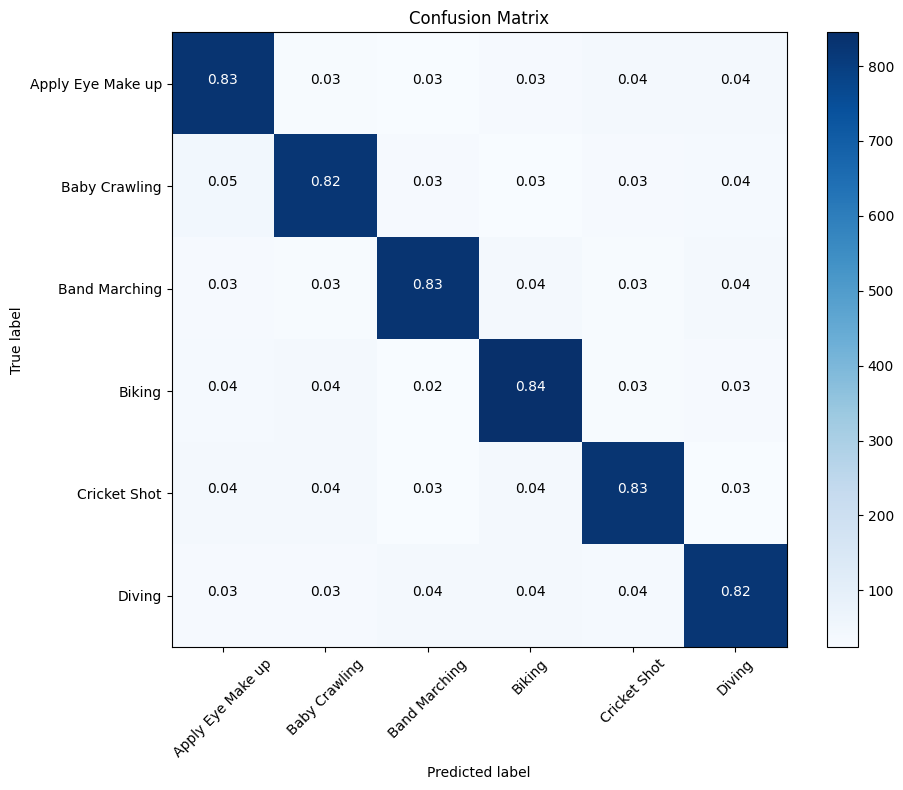

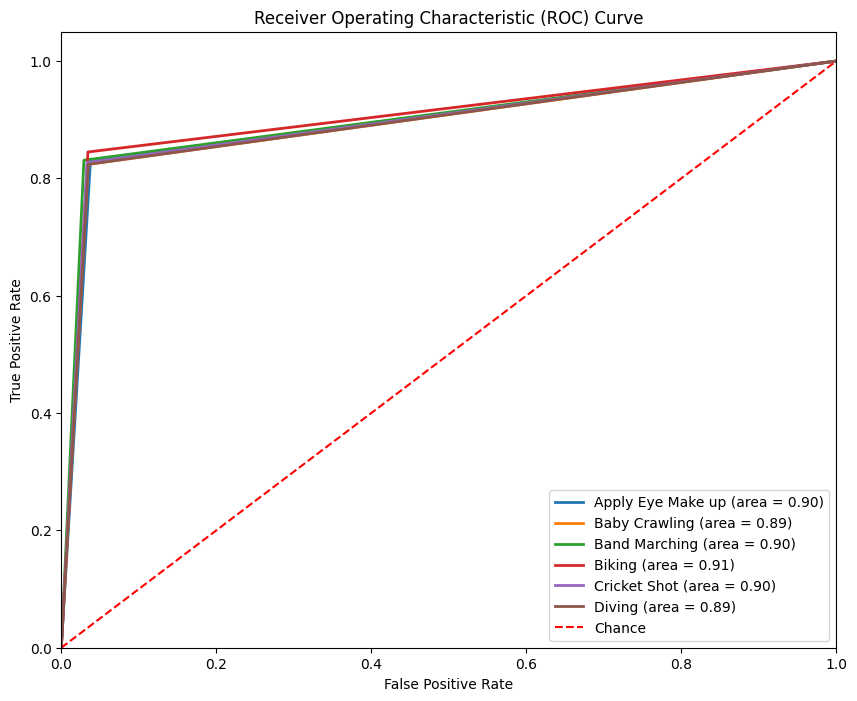

In [13]:


# Assuming you have the following variables already defined:
# model - your trained model
# validation_generator - your validation data generator
# selected_classes - list of class names

# Get true labels and predictions
Y_true = validation_generator.classes
Y_pred = model.predict(validation_generator)
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Generate classification report
print(classification_report(Y_true, Y_pred_classes, target_names=selected_classes))

# Confusion matrix
cm = confusion_matrix(Y_true, Y_pred_classes)
print('Confusion Matrix')
print(cm)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(selected_classes))
plt.xticks(tick_marks, selected_classes, rotation=45)
plt.yticks(tick_marks, selected_classes)

# Normalizing the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm_normalized[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if cm_normalized[i, j] > 0.5 else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

# ROC Curve
plt.figure(figsize=(10, 8))
for i, class_name in enumerate(selected_classes):
    fpr, tpr, _ = roc_curve(Y_true == i, Y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{class_name} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


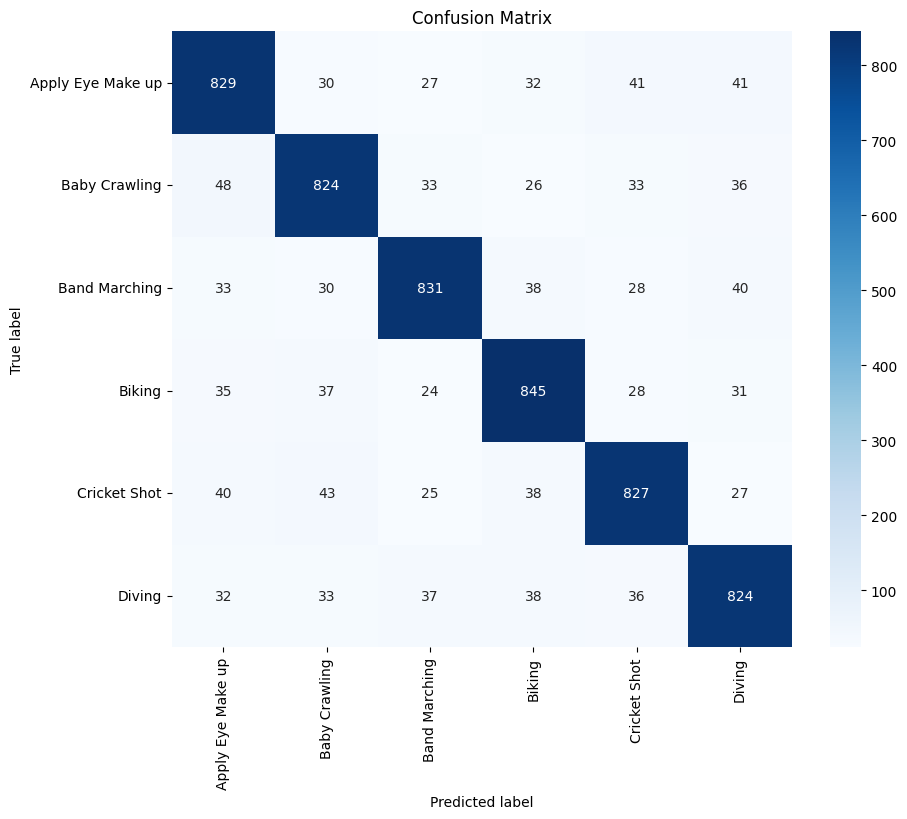

In [14]:



# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['Apply Eye Make up', 'Baby Crawling', 'Band Marching', 'Biking', 'Cricket Shot', 'Diving'],
            yticklabels=['Apply Eye Make up', 'Baby Crawling', 'Band Marching', 'Biking', 'Cricket Shot', 'Diving'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


                precision    recall  f1-score   support

baseball pitch       0.89      0.88      0.88      1000
   basket ball       0.87      0.88      0.88      1000
   bench press       0.88      0.87      0.88      1000
        biking       0.89      0.89      0.89      1000
     billiards       0.88      0.88      0.88      1000
 Breast stroke       0.87      0.88      0.88      1000

      accuracy                           0.88      6000
     macro avg       0.88      0.88      0.88      6000
  weighted avg       0.88      0.88      0.88      6000

Confusion Matrix
[[877  26  28  23  25  21]
 [ 22 880  23  14  27  34]
 [ 20  22 870  24  31  33]
 [ 18  34  23 887  18  20]
 [ 30  23  21  23 883  20]
 [ 23  23  21  25  25 883]]


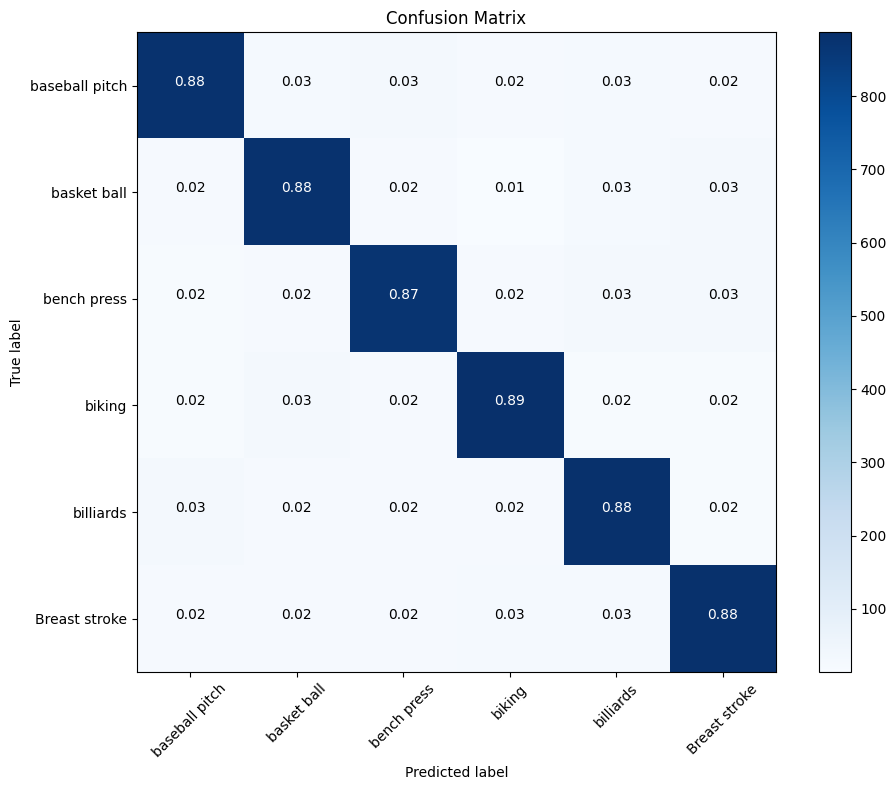

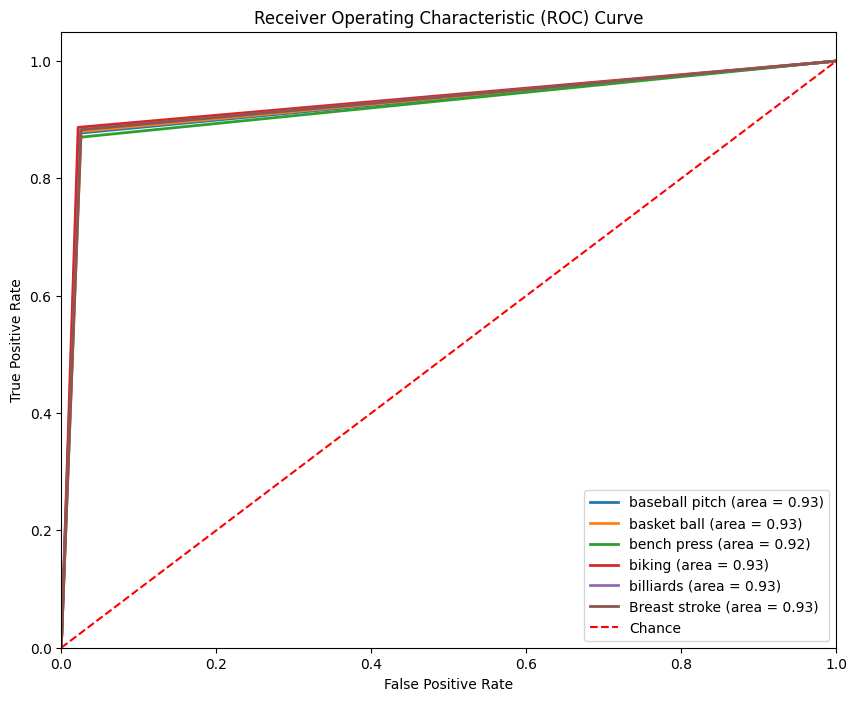

In [15]:

# Assuming you have the following variables already defined:
# model - your trained model
# validation_generator - your validation data generator
# selected_classes - list of class names

# Get true labels and predictions
Y_true = validation_generator.classes
Y_pred = model.predict(validation_generator)
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Generate classification report
print(classification_report(Y_true, Y_pred_classes, target_names=selected_classes))

# Confusion matrix
cm = confusion_matrix(Y_true, Y_pred_classes)
print('Confusion Matrix')
print(cm)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(selected_classes))
plt.xticks(tick_marks, selected_classes, rotation=45)
plt.yticks(tick_marks, selected_classes)

# Normalizing the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm_normalized[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if cm_normalized[i, j] > 0.5 else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

# ROC Curve
plt.figure(figsize=(10, 8))
for i, class_name in enumerate(selected_classes):
    fpr, tpr, _ = roc_curve(Y_true == i, Y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{class_name} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


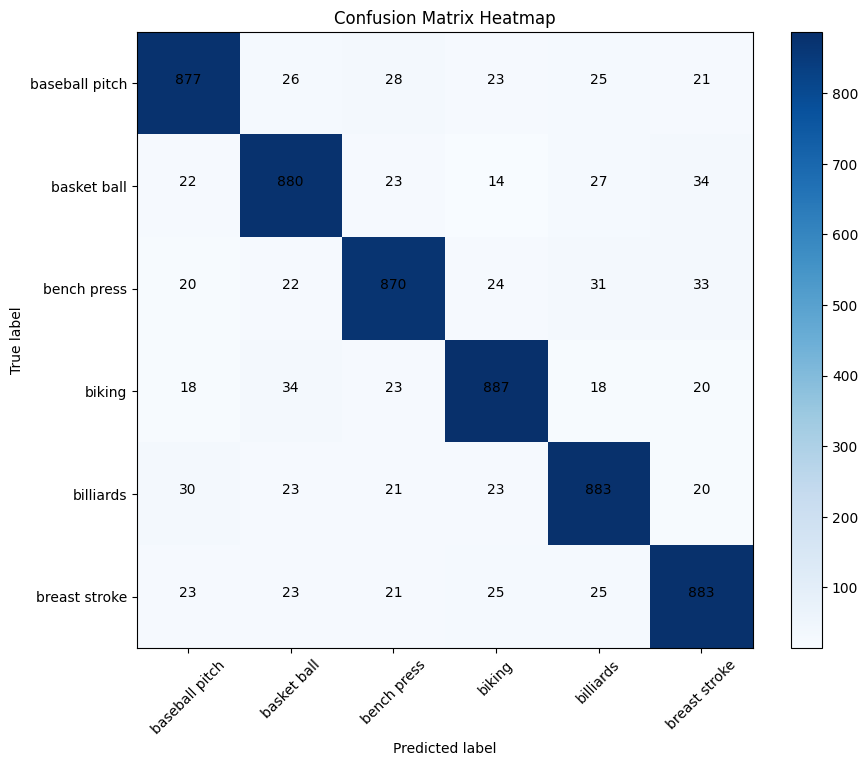

In [17]:


# Define class labels
class_labels = ['baseball pitch', 'basket ball', 'bench press', 'biking', 'billiards', 'breast stroke']



# Plot the heatmap
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')

# Add color bar
plt.colorbar()

# Set the tick marks and labels
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

# Add values in the cells
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, format(conf_matrix[i, j], '.0f'),
                 horizontalalignment="center",
                 color="black")

# Add labels and show plot
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix Heatmap')
plt.show()


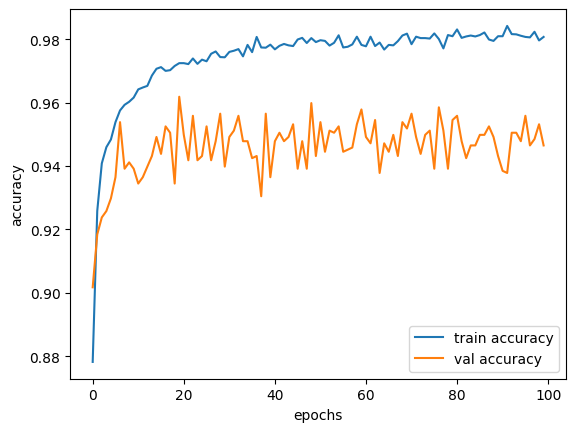

In [ ]:
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

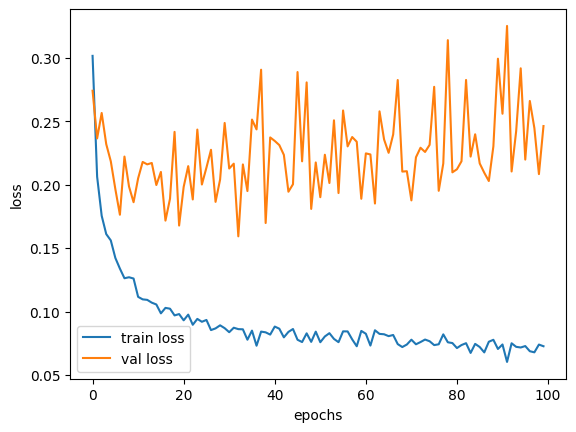

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()